In [142]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open','value','address','mined'])
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
print(df.tail())
#https://www.projectpro.io/article/how-to-build-arima-model-in-python/544


              price
date               
2022-10-21  19162.6
2022-10-22  19204.8
2022-10-23  19571.2
2022-10-24  19331.5
2022-10-25  20073.1


C:\Users\16474\AppData\Local\Temp\ipykernel_17304\2599259713.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


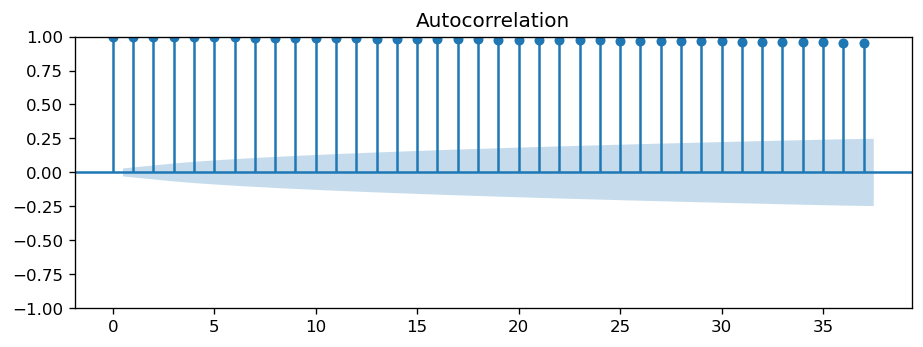

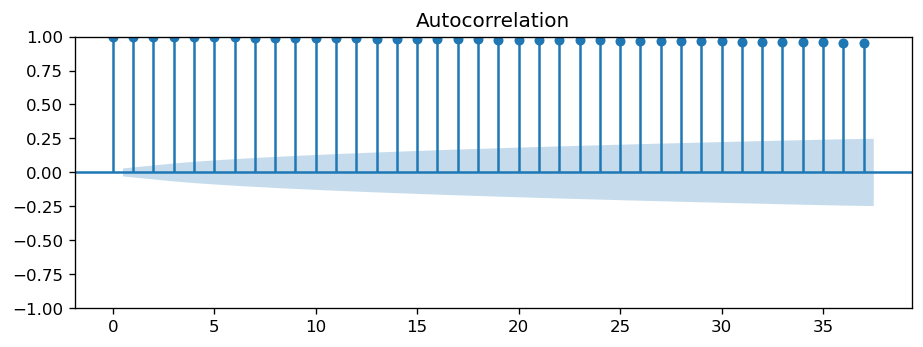

In [143]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plot_acf(df.price)


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


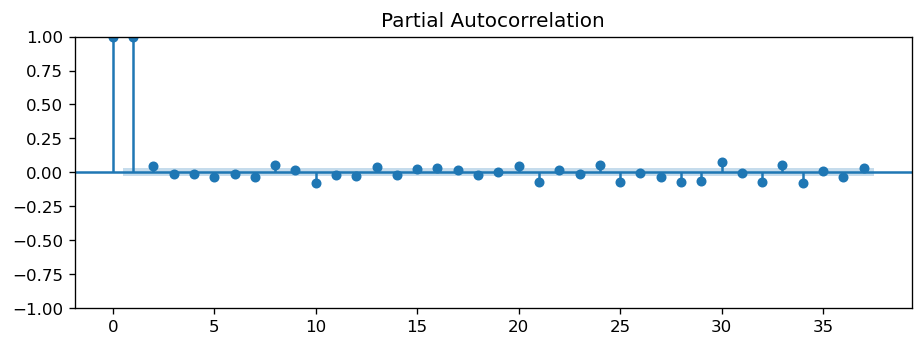

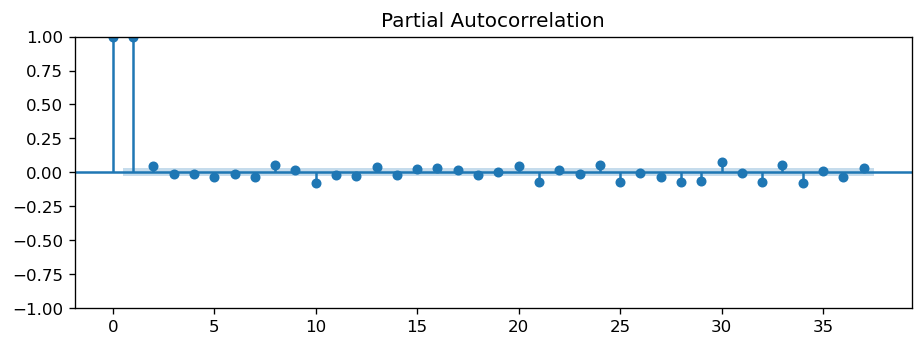

In [144]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plot_pacf(df.price)

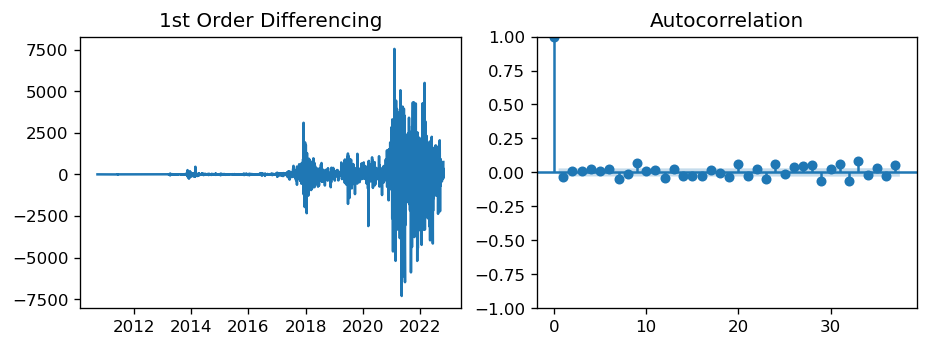

In [145]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_acf(df.price.diff().dropna(), ax=ax2)
plt.show()

In [146]:
result = adfuller(df.price.dropna())
print('p-value', result[1])

result = adfuller(df.price.diff().dropna())
print('p-value', result[1])

result = adfuller(df.price.diff().diff().dropna())
print('p-value', result[1])

p-value 0.3958551417121587
p-value 7.278050522529046e-19
p-value 0.0


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


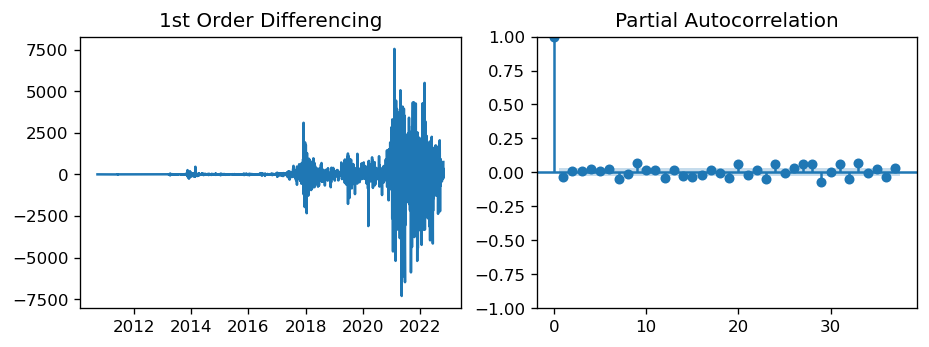

In [147]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.price.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.price.diff().dropna(), ax=ax2)
plt.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


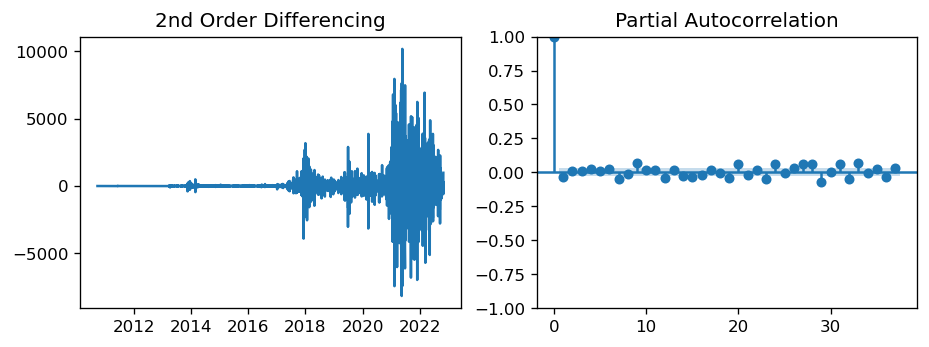

In [148]:
f = plt.figure()
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.price.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df.price.diff().dropna(), ax=ax2)
plt.show()

In [149]:
arima_model = ARIMA(df.price, order = (1,1,2))
model = arima_model.fit()
print(model.summary())

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 4386
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -34707.176
Date:                Wed, 16 Nov 2022   AIC                          69422.352
Time:                        22:49:35   BIC                          69447.896
Sample:                             0   HQIC                         69431.364
                               - 4386                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9647      0.014     71.323      0.000       0.938       0.991
ma.L1         -1.0018      0.014    -69.672      0.000      -1.030      -0.974
ma.L2          0.0441      0.007      6.787      0.0

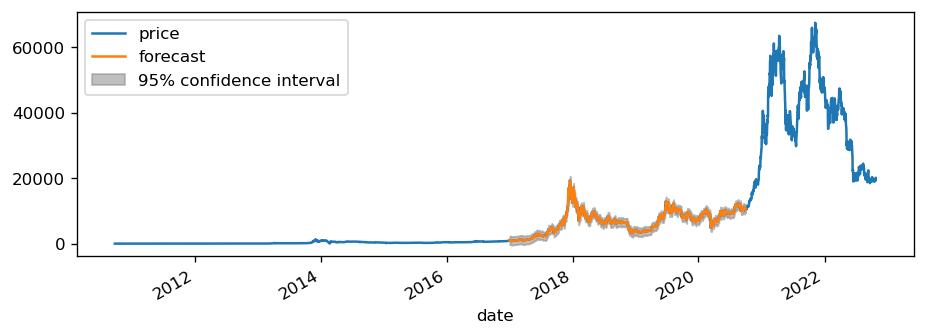

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, ax = plt.subplots()
ax = df.loc['2010':].plot(ax=ax)
plot_predict(model, '2017-01-01', '2020-10-01', ax=ax)

plt.show()

In [151]:
#ARIMA TEST 2

# 1ST Order differencing determines the parameter AR - order(AR-I-MA)
# Since 1st order diff made the data stationary then it is 1 in AR parameters

In [152]:
#https://www.justintodata.com/arima-models-in-python-time-series-prediction/
df_train = df.sample(frac=0.8, random_state=25)
df_test = df.drop(df_train.index)

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


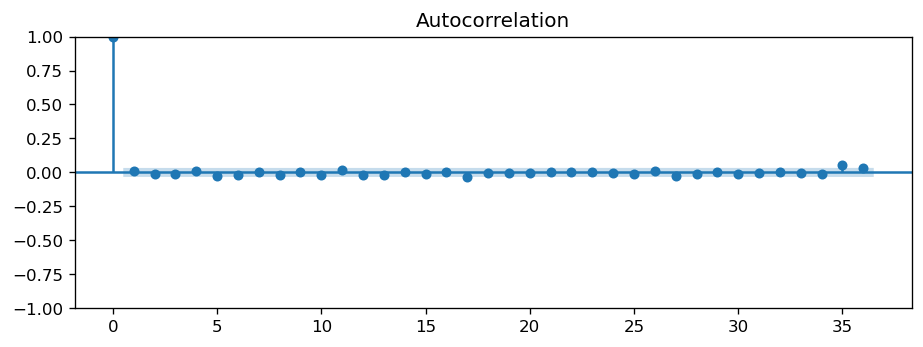

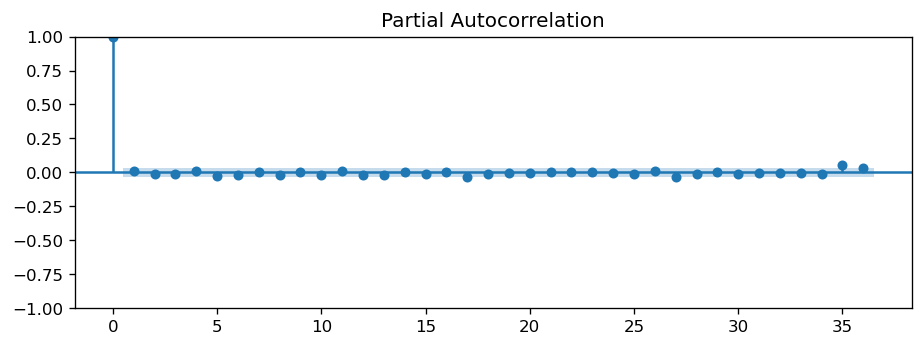

In [153]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [154]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


<AxesSubplot:xlabel='date'>

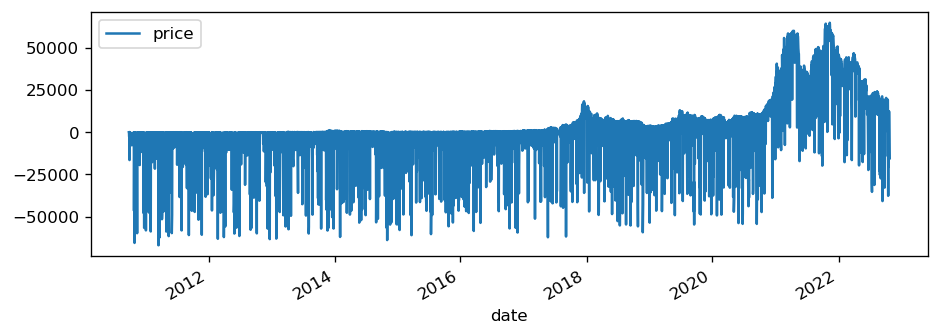

In [155]:
df_train_diff = df_train.diff().dropna()
df_train_diff.plot()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


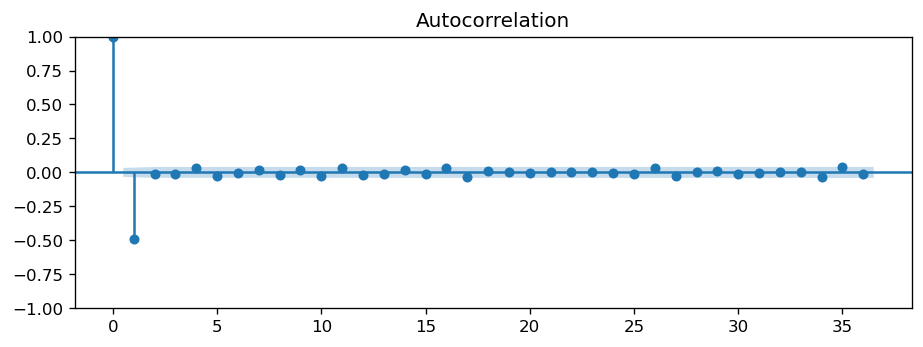

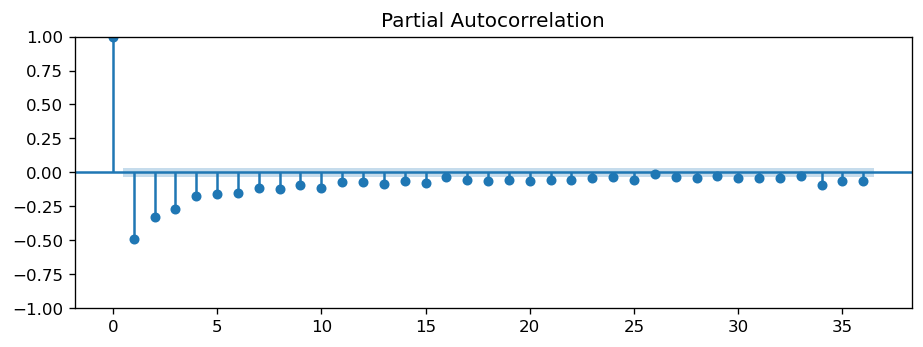

In [156]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [157]:

adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 2.2275437704041318e-30


In [158]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 3509
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -38650.950
Date:                Wed, 16 Nov 2022   AIC                          77307.900
Time:                        22:49:37   BIC                          77326.388
Sample:                             0   HQIC                         77314.497
                               - 3509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0124      0.017      0.740      0.459      -0.020       0.045
ma.L1         -1.0000      0.014    -69.562      0.000      -1.028      -0.972
sigma2      2.171e+08   6.61e-11   3.29e+18      0.0

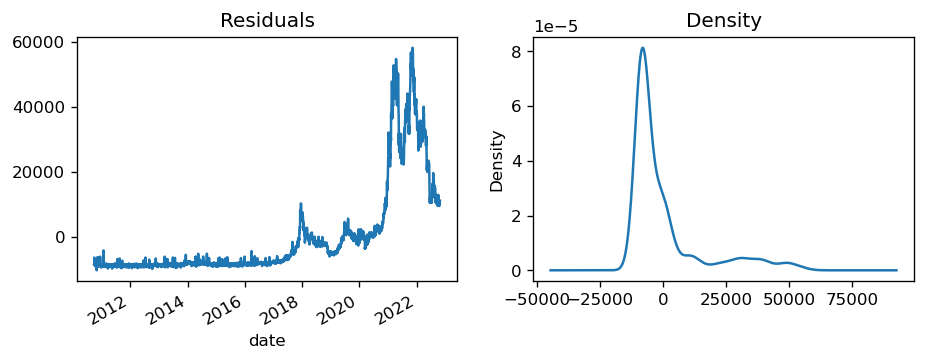

In [159]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


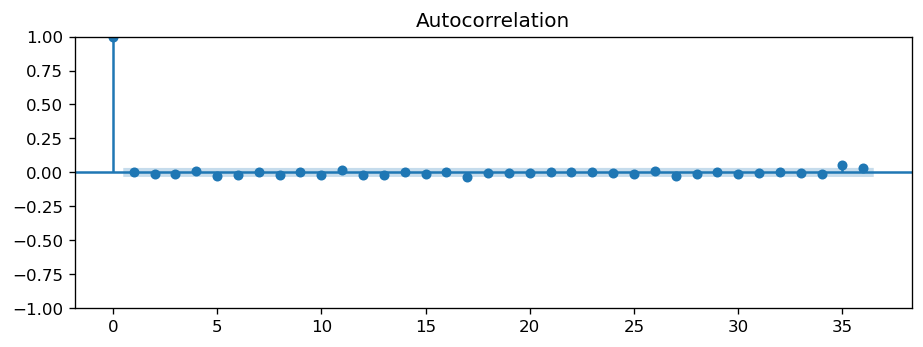

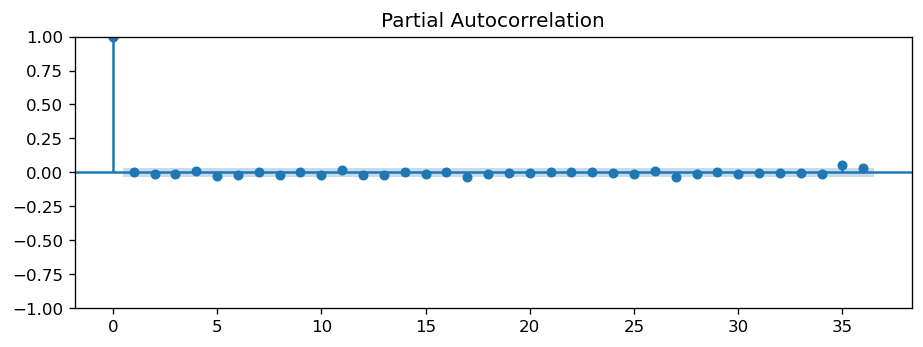

In [160]:

acf_res = plot_acf(residuals)

pacf_res = plot_pacf(residuals)

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='date'>

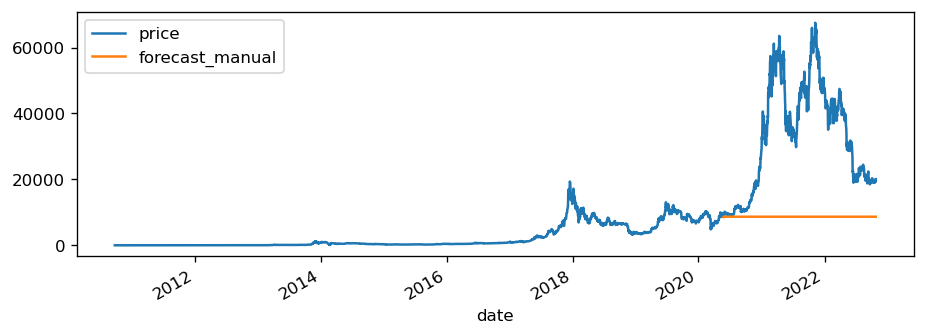

In [161]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [162]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(5, 0, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='date'>

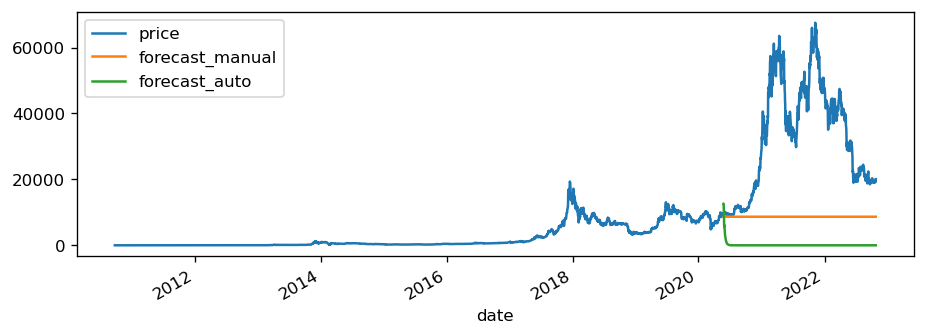

In [163]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [164]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 9967.95101287076
mape - manual: 1888.520168826052
rmse - manual: 14228.518370404337


In [165]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 8324.447029489129
mape - auto: 869.7565988823928
rmse - auto: 16449.21484353683
